In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

<b> View Cambodia Map </b>

In [3]:
Cambodia_map=folium.Map(location=[12.565679, 104.990967 ], zoom_start=7, )

Cambodia_map

<b> View Phnom Penh Map </b>

In [4]:
PhnomPenh_map=folium.Map(location=[11.556374, 104.928207 ], zoom_start=12)

PhnomPenh_map

In [6]:
import requests # library to handle requests
from bs4 import BeautifulSoup
import lxml.html as lh
import bs4 as bs
import urllib.request
print("Imported!")

Imported!


<b> Downloading and Exploring dataset </b> <br>
Source : <a href  = "https://en.wikipedia.org/wiki/Economy_of_Cambodia"> Click here </a>

In [7]:
wikipedia_link='https://en.wikipedia.org/wiki/Economy_of_Cambodia'
website_url = requests.get(wikipedia_link).text
soup = BeautifulSoup(website_url, 'lxml')
#print(soup.prettify())
My_table = soup.find('table', {'class':'wikitable sortable'})
#My_table
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]
I=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==9:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))

In [10]:
dfCambodia=pd.DataFrame(A,columns=['Category'])
dfCambodia['2004']=B
dfCambodia['2005']=C
dfCambodia['2006']=D
dfCambodia['2007']=E
dfCambodia['2008']=F
dfCambodia['2009']=G
dfCambodia['2010']=H
dfCambodia['2011']=I

In [9]:
dfCambodia=dfCambodia.to_csv(r'cambodia.csv')

In [11]:
dfCambodia=pd.read_csv(r'cambodia.csv')
dfCambodia.head()

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230\n"
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31\n
2,2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54\n"
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07\n


In [12]:
dfCambodia['2011'] = dfCambodia['2011'].str.replace('\n','')
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230"
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54"
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [13]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)  
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)","1,250","1,440","1,630","1,830","1,960","1,970","2,080","2,230"
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),"5,337.83","6,293.05","7,274.42","8,639.16","10,351.83","10,401.94","11,242.27","12,829.54"
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [14]:

dfCambodia["2004"]=dfCambodia["2004"].str.replace(',','')
dfCambodia["2005"]=dfCambodia["2005"].str.replace(',','')
dfCambodia["2006"]=dfCambodia["2006"].str.replace(',','')
dfCambodia["2007"]=dfCambodia["2007"].str.replace(',','')
dfCambodia["2008"]=dfCambodia["2008"].str.replace(',','')
dfCambodia["2009"]=dfCambodia["2009"].str.replace(',','')
dfCambodia["2010"]=dfCambodia["2010"].str.replace(',','')
dfCambodia["2011"]=dfCambodia["2011"].str.replace(',','')
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)",1250,1440,1630,1830,1960,1970,2080,2230
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [15]:
dfCambodia['2004'] = dfCambodia['2004'].astype(float)
dfCambodia['2005'] = dfCambodia['2005'].astype(float)
dfCambodia['2006'] = dfCambodia['2006'].astype(float)
dfCambodia['2007'] = dfCambodia['2007'].astype(float)
dfCambodia['2008'] = dfCambodia['2008'].astype(float)
dfCambodia['2009'] = dfCambodia['2009'].astype(float)
dfCambodia['2010'] = dfCambodia['2010'].astype(float)
dfCambodia['2011'] = dfCambodia['2011'].astype(float)
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011
0,"GNI per capita, PPP(current international $)",1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07


In [16]:

dfCambodia['Total'] = dfCambodia.sum(axis=1)
dfCambodia.head()

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,"GNI per capita, PPP(current international $)",1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [17]:
dfCambodia['Category'].replace({'GNI per capita, PPP(current international $)': 'GNI per capita($)'}, inplace=True)
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [18]:
dfCambodia.to_csv(r'economic_cambo.csv')

In [19]:
dfCambodia=pd.read_csv(r'economic_cambo.csv')
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [20]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)  
dfCambodia

,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [21]:

# group categories and apply sum() function 
dfCambodia = dfCambodia.groupby('Category', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dfCambodia.groupby('Category', axis=0)))

dfCambodia

<class 'pandas.core.groupby.DataFrameGroupBy'>


,2004,2005,2006,2007,2008,2009,2010,2011,Total
Category,,,,,,,,,
GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38
GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99


<h3> VISUALIZING DATA </h3>

In [22]:
years = list(map(str, range(2004, 2012)))
years

['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

In [23]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


In [24]:
dfCambodia.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# transpose the dataframe
dfCambodia = dfCambodia[years].transpose() 

dfCambodia

Category,GDP (Millions US$),GNI per capita($),Total Population (Millions),GDP Growth (annual %)
2004,5337.83,1250.0,13.19,10.34
2005,6293.05,1440.0,13.36,13.25
2006,7274.42,1630.0,13.52,10.77
2007,8639.16,1830.0,13.67,10.21
2008,10351.83,1960.0,13.82,6.69
2009,10401.94,1970.0,13.98,0.09
2010,11242.27,2080.0,14.14,5.96
2011,12829.54,2230.0,14.31,7.07


BAR GRAPH

Text(0.5,0,'Years')

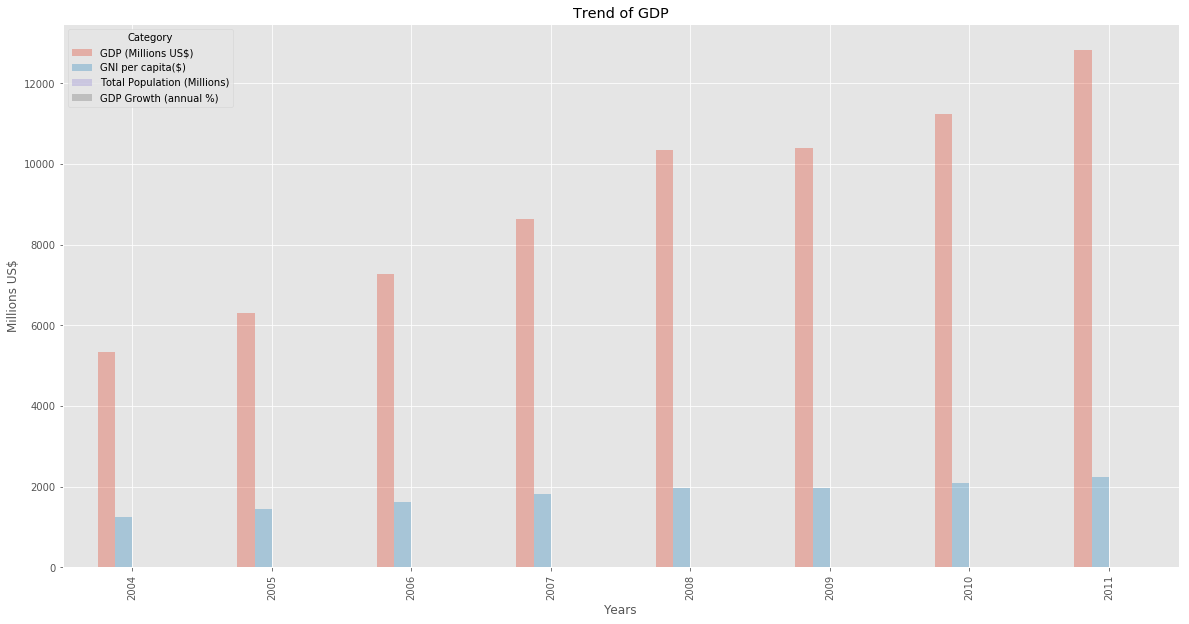

In [25]:
ax = dfCambodia.plot(kind='bar', alpha=0.35, figsize=(20, 10))

ax.set_title('Trend of GDP')
ax.set_ylabel('Millions US$')
ax.set_xlabel('Years')

In [27]:
dfCambodia =  pd.read_csv("economic_cambo.csv")
dfCambodia

,Unnamed: 0,Category,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,0,GNI per capita($),1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,1,Total Population (Millions),13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,2,GDP (Millions US$),5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,3,GDP Growth (annual %),10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [29]:
dfCambodia = dfCambodia.drop(dfCambodia.columns[[0]], axis=1)
dfCambodia

,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
1,13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
2,5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04
3,10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [30]:
dfCambodia.sort_values(by=['2011'])

,2004,2005,2006,2007,2008,2009,2010,2011,Total
3,10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38
1,13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
0,1250.00,1440.00,1630.00,1830.00,1960.00,1970.00,2080.00,2230.00,14390.00
2,5337.83,6293.05,7274.42,8639.16,10351.83,10401.94,11242.27,12829.54,72370.04


In [31]:
dfCambodia=dfCambodia.loc[dfCambodia.index.isin([3,1])]
dfCambodia

,2004,2005,2006,2007,2008,2009,2010,2011,Total
1,13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
3,10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [32]:
dfCambodia=  dfCambodia.reset_index()
dfCambodia.drop('index',axis=1,inplace=True)
dfCambodia

,2004,2005,2006,2007,2008,2009,2010,2011,Total
0,13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99
1,10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38


In [33]:
dfCambodia['Total2'] = dfCambodia.sum(axis=1)
dfCambodia.head()

,2004,2005,2006,2007,2008,2009,2010,2011,Total,Total2
0,13.19,13.36,13.52,13.67,13.82,13.98,14.14,14.31,109.99,219.98
1,10.34,13.25,10.77,10.21,6.69,0.09,5.96,7.07,64.38,128.76


In [40]:
# group categories and apply sum() function 
dfCambodia = dfCambodia.groupby('Category', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dfCambodia.groupby('Category', axis=0)))

dfCambodia

KeyError: 'Category'

In [42]:
years = list(map(str, range(2004, 2012)))
years

['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

In [37]:

dfCambodia.sort_values(['Total2'], ascending=False, axis=0, inplace=True)
#dfCambodia = dfCambodia.head()
# transpose the dataframe
dfCambodia = dfCambodia[years].transpose() 

dfCambodia

,0,1
2004,13.19,10.34
2005,13.36,13.25
2006,13.52,10.77
2007,13.67,10.21
2008,13.82,6.69
2009,13.98,0.09
2010,14.14,5.96
2011,14.31,7.07


<h3> Total Population and GDP growth (annual) </h3>

Text(0.5,0,'Years')

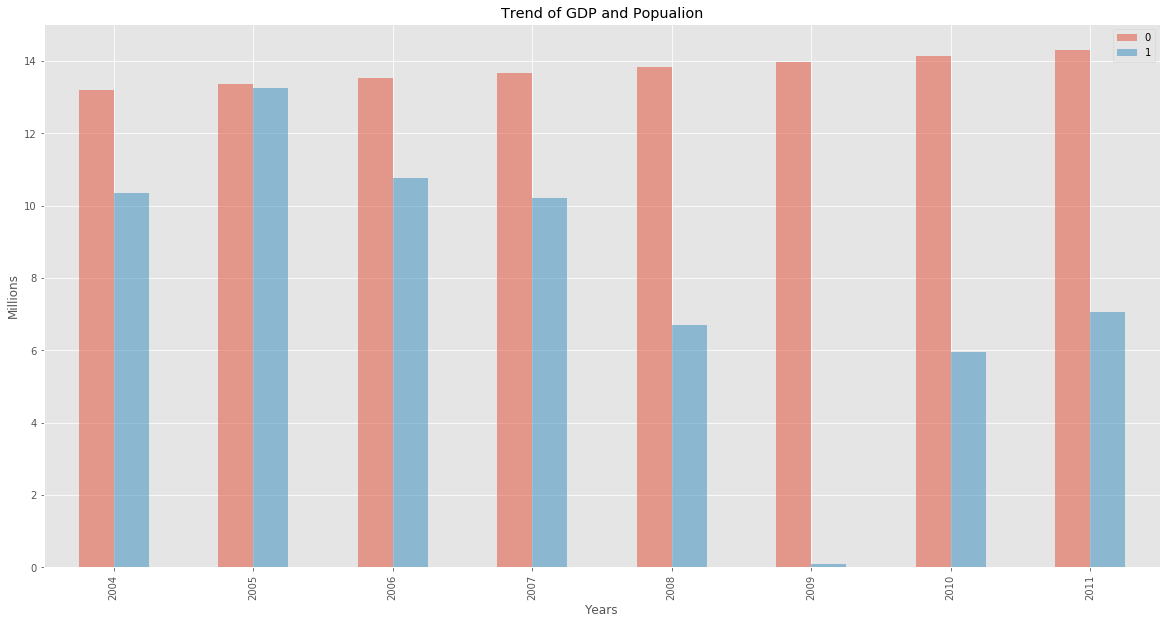

In [45]:
# option 2: preferred option with more flexibility
ax = dfCambodia.plot(kind='bar', alpha=0.5, figsize=(20, 10))

ax.set_title('Trend of GDP and Popualion')
ax.set_ylabel('Millions')
ax.set_xlabel('Years')

Connecting to FOURSQUARE

In [46]:
CLIENT_ID = 'IZ5EOEQ5P2GTJ3THWC1ZMAP2HIOGZYYCH3Y3TOBO4TX4DLCN' # your Foursquare ID
CLIENT_SECRET = 'D4RSFHALKRZS5FF2XQSEZKOG21K0BKKEJQXXMON40KJKG0N4' # your Foursquare Secret
VERSION = '20190629'
LIMIT = 40
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: IZ5EOEQ5P2GTJ3THWC1ZMAP2HIOGZYYCH3Y3TOBO4TX4DLCN
CLIENT_SECRET:D4RSFHALKRZS5FF2XQSEZKOG21K0BKKEJQXXMON40KJKG0N4


In [47]:
address = 'Sisowath Quay, Phnom Penh, Cambodia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

11.5729662 104.9292037


Searching for a specific venue

In [48]:
search_query = 'Hotel'
radius = 1500
print(search_query + ' .... OK!')

Hotel .... OK!


In [49]:
# @hidden_cell
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IZ5EOEQ5P2GTJ3THWC1ZMAP2HIOGZYYCH3Y3TOBO4TX4DLCN&client_secret=D4RSFHALKRZS5FF2XQSEZKOG21K0BKKEJQXXMON40KJKG0N4&ll=11.5729662,104.9292037&v=20190629&query=Hotel&radius=1500&limit=40'

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d179ca26f0aa2002ccd84a1'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/bedandbreakfast_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1f8931735',
      'name': 'Bed & Breakfast',
      'pluralName': 'Bed & Breakfasts',
      'primary': True,
      'shortName': 'B & B'}],
    'hasPerk': False,
    'id': '566444ae498e3f71fdff1afb',
    'location': {'address': 'Preah Mohaksat Treiyani Kossamak',
     'cc': 'KH',
     'country': 'កម្ពុជា',
     'distance': 286,
     'formattedAddress': ['Preah Mohaksat Treiyani Kossamak', 'កម្ពុជា'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 11.5743276351061,
       'lng': 104.9269761392007}],
     'lat': 11.5743276351061,
     'lng': 104.9269761392007},
    'name': 'De Art Boutique Hotel',
    'referralId': 'v-1561828514'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suf

In [51]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dfHotel = json_normalize(venues)
dfHotel.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'shortName': 'B & B', 'id': '4bf58dd8d48988d...",False,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,NaN,កម្ពុជា,NaN,286,"[Preah Mohaksat Treiyani Kossamak, កម្ពុជា]","[{'lng': 104.9269761392007, 'lat': 11.57432763...",11.574328,104.926976,NaN,NaN,De Art Boutique Hotel,v-1561828514,NaN
1,"[{'shortName': 'Hotel', 'id': '4bf58dd8d48988d...",False,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Phnum Pénh,កម្ពុជា,NaN,918,"[No. 1, Street 92, Sangkat Wat Phnom, Phnum Pé...","[{'lng': 104.92149134614719, 'lat': 11.5762890...",11.576289,104.921491,NaN,Phnom Penh,Sunway Hotel,v-1561828514,NaN
2,"[{'shortName': 'Hotel', 'id': '4bf58dd8d48988d...",False,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Phnum Pénh,កម្ពុជា,Phsar Kandal I,172,"[No. 28-30 | ST 130 (Phsar Kandal I), Phnum Pé...","[{'lng': 104.92850526184863, 'lat': 11.5715762...",11.571576,104.928505,NaN,Phnom Penh,Indochine II Hotel,v-1561828514,NaN
3,"[{'shortName': 'Hotel', 'id': '4bf58dd8d48988d...",False,50da3f28e4b0db4f4c1056c6,NaN,KH,Phnum Pénh,កម្ពុជា,NaN,712,"[Phnum Pénh, កម្ពុជា]","[{'lng': 104.9305122452778, 'lat': 11.56669252...",11.566693,104.930512,NaN,Phnom Penh,Frangipani Royal Palace Hotel,v-1561828514,NaN
4,"[{'shortName': 'Hotel', 'id': '4bf58dd8d48988d...",False,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Phnum Pénh,កម្ពុជា,NaN,1036,"[St Keo Chenda, Phume 1, Sangkat Chroy Changva...","[{'lng': 104.93763892526749, 'lat': 11.5686741...",11.568674,104.937639,NaN,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561828514,NaN


Cleaning data

In [52]:
dfHotel.drop(['categories','hasPerk','location.formattedAddress','location.crossStreet','location.city','location.labeledLatLngs','location.postalCode','venuePage.id'], axis=1, inplace=True)

dfHotel.head()

,id,location.address,location.cc,location.country,location.distance,location.lat,location.lng,location.state,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,កម្ពុជា,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561828514
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,កម្ពុជា,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561828514
2,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,កម្ពុជា,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561828514
3,50da3f28e4b0db4f4c1056c6,NaN,KH,កម្ពុជា,712,11.566693,104.930512,Phnom Penh,Frangipani Royal Palace Hotel,v-1561828514
4,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,កម្ពុជា,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561828514


Renaming Fields

In [53]:
dfHotel.rename(columns={'location.address':'Address', 'location.country':'Country','location.distance':'Distance','location.lat':'Latitude','location.lng':'Longtitude','location.state':'City'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,កម្ពុជា,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561828514
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,កម្ពុជា,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561828514
2,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,កម្ពុជា,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561828514
3,50da3f28e4b0db4f4c1056c6,NaN,KH,កម្ពុជា,712,11.566693,104.930512,Phnom Penh,Frangipani Royal Palace Hotel,v-1561828514
4,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,កម្ពុជា,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561828514


In [54]:
dfHotel['Country'] = dfHotel['Country'].str.replace('កម្ពុជា','Cambodia')
#dfHotel['City'] = dfHotel['City'].str.replace('NaN','Phnom Penh')

dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,Cambodia,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561828514
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Cambodia,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561828514
2,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Cambodia,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561828514
3,50da3f28e4b0db4f4c1056c6,NaN,KH,Cambodia,712,11.566693,104.930512,Phnom Penh,Frangipani Royal Palace Hotel,v-1561828514
4,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Cambodia,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561828514


In [55]:
dfHotel.shape

(40, 10)

In [56]:
dfHotel.to_csv(r'hotelCambodia.csv')

Reading data from the above created file

In [57]:
dfHotel=pd.read_csv(r'hotelCambodia.csv')

In [58]:
dfHotel = dfHotel.drop(dfHotel.columns[[0]], axis=1)  
dfHotel.head()

,id,Address,location.cc,Country,Distance,Latitude,Longtitude,City,name,referralId
0,566444ae498e3f71fdff1afb,Preah Mohaksat Treiyani Kossamak,KH,Cambodia,286,11.574328,104.926976,NaN,De Art Boutique Hotel,v-1561828514
1,4d12b87bd1848cfab365be71,"No. 1, Street 92, Sangkat Wat Phnom",KH,Cambodia,918,11.576289,104.921491,Phnom Penh,Sunway Hotel,v-1561828514
2,4e5c9532183883e00c0ab90c,No. 28-30 | ST 130,KH,Cambodia,172,11.571576,104.928505,Phnom Penh,Indochine II Hotel,v-1561828514
3,50da3f28e4b0db4f4c1056c6,NaN,KH,Cambodia,712,11.566693,104.930512,Phnom Penh,Frangipani Royal Palace Hotel,v-1561828514
4,533550f5498ee52eacefc6ca,"St Keo Chenda, Phume 1, Sangkat Chroy Changvar",KH,Cambodia,1036,11.568674,104.937639,Phnom Penh,Sokha Phnom Penh Hotel & Residence,v-1561828514


In [59]:
address = 'Phnom Penh, Cambodia'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Phnom Penh are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Phnom Penh are 11.568271, 104.9224426.


In [60]:
# create map of Phnom Penh using latitude and longitude values
map_phnompenh = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(dfHotel['Latitude'], dfHotel['Longtitude'], dfHotel['name']):
    label = '{}, {}'.format(dfHotel, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_phnompenh)  
    
map_phnompenh

Searching an Italian Restaurant within 500 metres from the hotel

In [61]:

search_query = 'KFC'
radius = 500
print(search_query + ' .... OK!')

KFC .... OK!


In [62]:
# @hidden_cell
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=IZ5EOEQ5P2GTJ3THWC1ZMAP2HIOGZYYCH3Y3TOBO4TX4DLCN&client_secret=D4RSFHALKRZS5FF2XQSEZKOG21K0BKKEJQXXMON40KJKG0N4&ll=11.568271,104.9224426&v=20190629&query=KFC&radius=500&limit=40'

In [63]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d179db1e8f928002311e875'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'primary': True,
      'shortName': 'Fast Food'}],
    'hasPerk': False,
    'id': '4c297048e19720a10198f958',
    'location': {'address': 'No. 170, Preah Monivong',
     'cc': 'KH',
     'city': 'Phnum Pénh',
     'country': 'កម្ពុជា',
     'distance': 407,
     'formattedAddress': ['No. 170, Preah Monivong',
      'Phnum Pénh 855',
      'កម្ពុជា'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 11.568649975980398,
       'lng': 104.91872911072161}],
     'lat': 11.568649975980398,
     'lng': 104.91872911072161,
     'postalCode': '855',
     'state': 'Phnom Penh'},
    'name': 'KFC',
    'referralId': 'v-1561828785'},
   {'categories': []

In [64]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'shortName': 'Fast Food', 'id': '4bf58dd8d48...",False,4c297048e19720a10198f958,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'lng': 104.91872911072161, 'lat': 11.5686499...",11.568650,104.918729,855,Phnom Penh,KFC,v-1561828785
1,[],False,4c9c4790031337040e1654d5,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'lng': 104.918682, 'lat': 11.568682, 'label'...",11.568682,104.918682,NaN,NaN,KFC next to Diamond hotel,v-1561828785


In [65]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'lng': 104.91872911072161, 'lat': 11.5686499...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'lng': 104.918682, 'lat': 11.568682, 'label'...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [67]:
dataframe_filtered.columns

Index(['name', 'categories', 'address', 'cc', 'city', 'country', 'distance',
       'formattedAddress', 'labeledLatLngs', 'lat', 'lng', 'postalCode',
       'state', 'id'],
      dtype='object')

In [68]:
dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,កម្ពុជា,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'lng': 104.91872911072161, 'lat': 11.5686499...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,កម្ពុជា,412,[កម្ពុជា],"[{'lng': 104.918682, 'lat': 11.568682, 'label'...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [70]:
dataframe_filtered['country'] = dataframe_filtered['country'].str.replace('កម្ពុជា','Cambodia')
#dfHotel['City'] = dfHotel['City'].str.replace('NaN','Phnom Penh')

dataframe_filtered.head()

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,Cambodia,407,"[No. 170, Preah Monivong, Phnum Pénh 855, កម្ព...","[{'lng': 104.91872911072161, 'lat': 11.5686499...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,Cambodia,412,[កម្ពុជា],"[{'lng': 104.918682, 'lat': 11.568682, 'label'...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [71]:
dataframe_filtered.drop(['formattedAddress'], axis=1, inplace=True)
dataframe_filtered

,name,categories,address,cc,city,country,distance,labeledLatLngs,lat,lng,postalCode,state,id
0,KFC,Fast Food Restaurant,"No. 170, Preah Monivong",KH,Phnum Pénh,Cambodia,407,"[{'lng': 104.91872911072161, 'lat': 11.5686499...",11.568650,104.918729,855,Phnom Penh,4c297048e19720a10198f958
1,KFC next to Diamond hotel,None,NaN,KH,NaN,Cambodia,412,"[{'lng': 104.918682, 'lat': 11.568682, 'label'...",11.568682,104.918682,NaN,NaN,4c9c4790031337040e1654d5


In [72]:
dataframe_filtered.name

0                          KFC
1    KFC next to Diamond hotel
Name: name, dtype: object

In [73]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup=' The Quay Hotel Phnom Penh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Exploring nearby KFC

In [74]:
# @hidden_cell
venue_id = '4c297048e19720a10198f958' #Fast Food Restaurant	
#venue_id = '4ecf21ae8231b9ef870d3697' # ID of KFC - Phsar Chas
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c297048e19720a10198f958?client_id=IZ5EOEQ5P2GTJ3THWC1ZMAP2HIOGZYYCH3Y3TOBO4TX4DLCN&client_secret=D4RSFHALKRZS5FF2XQSEZKOG21K0BKKEJQXXMON40KJKG0N4&v=20190629'

In [76]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['bestPhoto', 'shortUrl', 'ratingSignals', 'name', 'listed', 'ok', 'verified', 'createdAt', 'reasons', 'tips', 'hereNow', 'dislike', 'colors', 'attributes', 'specials', 'beenHere', 'likes', 'location', 'inbox', 'contact', 'ratingColor', 'stats', 'photos', 'allowMenuUrlEdit', 'canonicalUrl', 'rating', 'price', 'categories', 'pageUpdates', 'timeZone', 'id'])


{'allowMenuUrlEdit': True,
 'attributes': {'groups': [{'count': 1,
    'items': [{'displayName': 'Price', 'displayValue': '$', 'priceTier': 1}],
    'name': 'Price',
    'summary': '$',
    'type': 'price'},
   {'count': 1,
    'items': [{'displayName': 'Wi-Fi', 'displayValue': 'Yes'}],
    'name': 'Wi-Fi',
    'summary': 'Wi-Fi',
    'type': 'wifi'}]},
 'beenHere': {'count': 0,
  'lastCheckinExpiredAt': 0,
  'marked': False,
  'unconfirmedCount': 0},
 'bestPhoto': {'createdAt': 1370408910,
  'height': 612,
  'id': '51aec7ce498edff276783048',
  'prefix': 'https://fastly.4sqi.net/img/general/',
  'source': {'name': 'Instagram', 'url': 'http://instagram.com'},
  'suffix': '/55145175_y2mPjMlH7WVeWrl6cYz8qXO8M5ebMRahR1BhvX_z2dg.jpg',
  'visibility': 'public',
  'width': 612},
 'canonicalUrl': 'https://foursquare.com/v/kfc/4c297048e19720a10198f958',
 'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
    'suffix': '.png'},
   'id': '4bf58dd8d48988d16

Checking Venue's Rating

In [78]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.3


Checking the rating of second closest restaurant to KFC

In [79]:
venue_id = '4dccbfd6ae603b786d0671af' # ID of KFC
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.2


Getting the number of tips

In [80]:
result['response']['venue']['tips']['count']

13

In [81]:
result['response']['venue']['tips']

{'count': 13,
 'groups': [{'count': 13,
   'items': [{'agreeCount': 0,
     'canonicalUrl': 'https://foursquare.com/item/4d6379d6dcafa1cd3eb97111',
     'createdAt': 1298364886,
     'disagreeCount': 0,
     'id': '4d6379d6dcafa1cd3eb97111',
     'lang': 'en',
     'likes': {'count': 4,
      'groups': [{'count': 4, 'items': [], 'type': 'others'}],
      'summary': '4 likes'},
     'logView': True,
     'text': 'Good wifi!!!!',
     'todo': {'count': 0},
     'type': 'user',
     'user': {'firstName': 'Danny',
      'gender': 'male',
      'id': '6977422',
      'lastName': 'M',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/TTTGIHXSYEOWBCKK.jpg'}}}],
   'name': 'All tips',
   'type': 'others'}]}

In [82]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d179ec89df1dc002f2dc2db'},
 'response': {'tips': {'count': 13,
   'items': [{'agreeCount': 0,
     'canonicalUrl': 'https://foursquare.com/item/4df5ab33cc3fc3e01352c57f',
     'createdAt': 1307945779,
     'disagreeCount': 0,
     'id': '4df5ab33cc3fc3e01352c57f',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'text': 'Try their Chicken Fillet with Green Curry.  Its a little bit spicy and very delicious,  Just for 2 USD for a set meal (with rice and pepsi).',
     'todo': {'count': 1},
     'type': 'user',
     'user': {'firstName': 'Neil Ian',
      'gender': 'male',
      'id': '9525376',
      'lastName': 'U',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/UNFRK45IPXXQUYUJ.png'}}}]}}}

In [83]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['disagreeCount', 'canonicalUrl', 'text', 'type', 'createdAt', 'user', 'id', 'agreeCount', 'logView', 'lang', 'todo', 'likes'])

In [84]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Try their Chicken Fillet with Green Curry. Its a little bit spicy and very delicious, Just for 2 USD for a set meal (with rice and pepsi).",0,0,4df5ab33cc3fc3e01352c57f,Neil Ian,U,male,9525376


<b> Searching a user < /b>